In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd

# Black-Scholes greeks
def black_scholes_call_price(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r*T) * norm.cdf(d2)

def call_delta(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    return norm.cdf(d1) #delta measures how much the option price changes with asset price

def call_gamma(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    return norm.pdf(d1) / (S * sigma * np.sqrt(T)) #gamme measures how much Delta changes with asset price (derivative).

def call_vega(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    return S * norm.pdf(d1) * np.sqrt(T) / 100 #vega measures how much the option price changes with change in volatility

def call_theta(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    term1 = - (S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T))
    term2 = r * K * np.exp(-r*T) * norm.cdf(d2)
    return (term1 - term2) / 365 #theta measures time decay

# Portfolio parameters
S0 = 500
K = 500
T = 30 / 365
r = 0.01
sigma = 0.2
T_days = 90
n_days = T_days
short_calls = 10
dt = 1/365

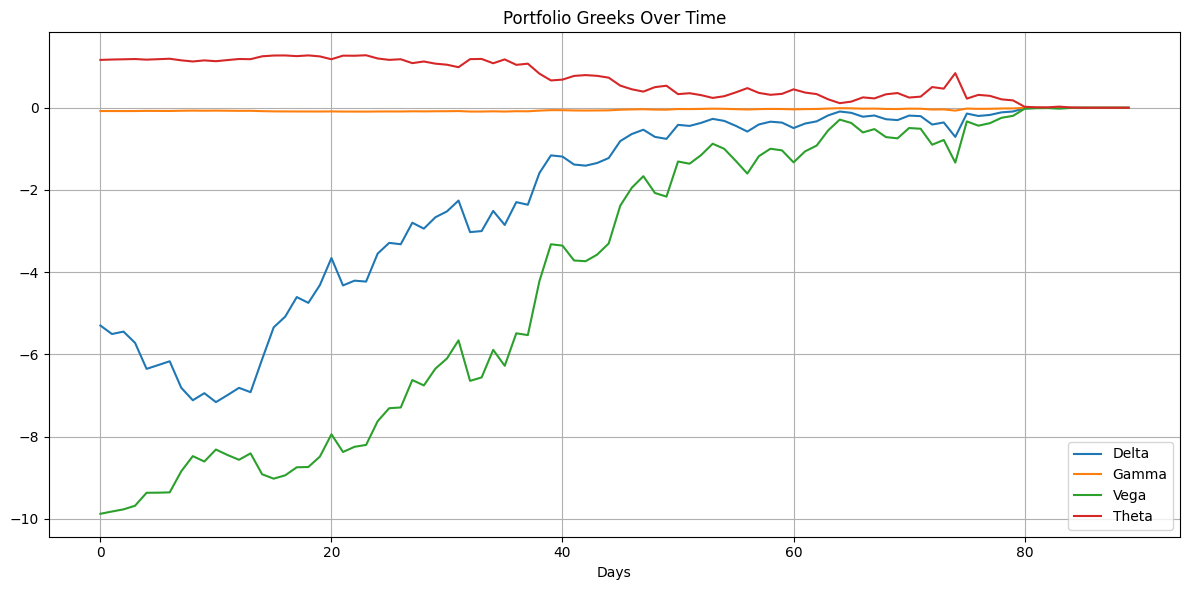

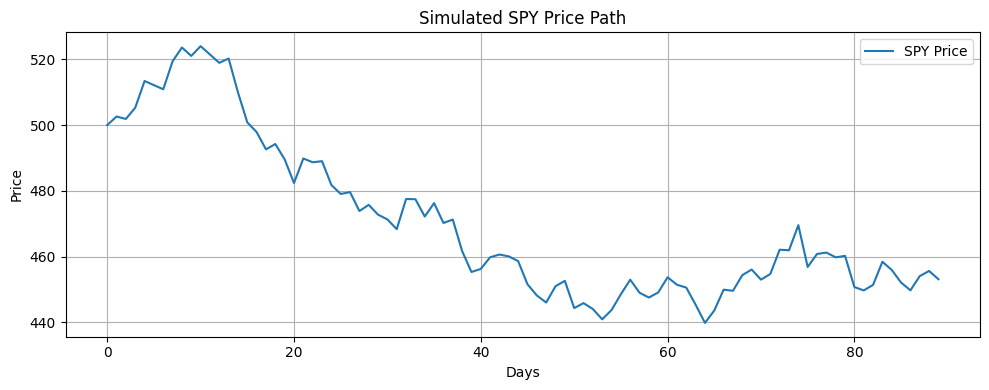

In [22]:
# Generate random price path
np.random.seed(42)
daily_returns = np.random.normal(loc=0, scale=sigma*np.sqrt(dt), size=n_days)
prices = [S0 * np.exp(np.sum(daily_returns[:i])) for i in range(n_days)]

# Compute greeks over time
states = []

for day in range(n_days):
    S = prices[day]
    T = (T_days - day) / 365
    delta = -short_calls * call_delta(S, K, T, r, sigma)
    gamma = -short_calls * call_gamma(S, K, T, r, sigma)
    vega = -short_calls * call_vega(S, K, T, r, sigma)
    theta = -short_calls * call_theta(S, K, T, r, sigma)
    
    states.append([S, T, sigma, delta, gamma, vega, theta])

# Convert to dataframe for plotting
df = pd.DataFrame(states, columns=["Spot", "T", "IV", "Delta", "Gamma", "Vega", "Theta"])

# Plotting greeks over time
df[["Delta", "Gamma", "Vega", "Theta"]].plot(figsize=(12,6), title="Portfolio Greeks Over Time")
plt.xlabel("Days")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting SPY price path
plt.figure(figsize=(10,4))
plt.plot(df["Spot"], label="SPY Price")
plt.title("Simulated SPY Price Path")
plt.xlabel("Days")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()